In [91]:
import pandas as pd
import numpy as np

In [128]:
df=pd.read_csv('confusion_matrix.csv')
# df=pd.read_csv('test_output.csv')
# df=pd.read_csv('output.csv')
df=df.iloc[1:]


In [130]:
# all are rejectance probabilities
df

,Title,Restricted Words Check,Restricted Prefix/Suffix Check,Title Combination Check,Space No Space Check,Minimum Title Length Check,Special Characters Check,Same Title Probability,Similar Title Probability,Similar Sounding Title Probability
1,LUCKNOW JANHIT JAGRAN,True,True,False,False,True,True,100.0,39.083898,0.000000
2,BHARAT VANI,True,True,True,True,True,True,0.0,19.448113,0.000000
3,DESH SAMACHAR,True,True,True,True,True,True,0.0,14.980000,0.000000
4,NAVBHARAT DARPAN,True,True,True,True,True,True,0.0,12.643802,0.000000
5,JAN PRAKASH,True,True,True,True,True,True,0.0,11.648077,0.000000
...,...,...,...,...,...,...,...,...,...,...
77,Prakash Pathak,True,True,True,True,True,True,0.0,7.600000,18.145455
78,Bharat Awaaz,True,True,True,True,True,True,0.0,23.397222,28.313095
79,Swabhiman Patrika,True,True,True,True,True,True,0.0,5.152564,12.952941
80,Lok Jagriti,True,True,True,True,True,True,0.0,7.047917,13.319608


In [134]:

def add_reject_accept_column(file_path, output_file):
    df = pd.read_csv(file_path)
    df=df.iloc[1:]
    bool_columns = ['Restricted Words Check', 
                    'Restricted Prefix/Suffix Check', 
                    'Title Combination Check', 
                    'Space No Space Check', 
                    'Minimum Title Length Check', 
                    'Special Characters Check']

    # 1 - Reject , 0 - Accept
    # for col in bool_columns:
    #     df[col] = df[col].astype(bool) 
    # df['Reject'] = df[bool_columns].apply(lambda row: 1 if any(value == False for value in row) else 0, axis=1)


    df['Reject'] = (df[bool_columns] == False).any(axis=1).astype(int)

    # df['Reject'] = df[bool_columns].apply(lambda x: 0 if all(x) else 1, axis=1)

    # df['Reject'] = df[['Restricted Words Check', 
    #                           'Restricted Prefix/Suffix Check', 
    #                           'Title Combination Check', 
    #                           'Space No Space Check', 
    #                           'Minimum Title Length Check', 
    #                           'Special Characters Check']].apply(lambda row: 1 if any(row==False) else 0, axis=1)
    df.loc[df['Same Title Probability'] == 0, 'Reject'] = 0
    df.loc[df['Same Title Probability'] != 0, 'Reject'] = 1
    # Add a new column for bins based on 'Similar Title Probability'
    def calculate_bin(probability):
        if probability < 25:
            return 0
        elif probability < 50:
            return 1
        elif probability < 75:
            return 2
        elif probability <= 100:
            return 3

    df['Bin'] = df['Same Title Probability'].apply(calculate_bin)
    return df
df2=add_reject_accept_column("confusion_matrix.csv","")
df2

,Title,Restricted Words Check,Restricted Prefix/Suffix Check,Title Combination Check,Space No Space Check,Minimum Title Length Check,Special Characters Check,Same Title Probability,Similar Title Probability,Similar Sounding Title Probability,Reject,Bin
1,LUCKNOW JANHIT JAGRAN,True,True,False,False,True,True,100.0,39.083898,0.000000,1,3
2,BHARAT VANI,True,True,True,True,True,True,0.0,19.448113,0.000000,0,0
3,DESH SAMACHAR,True,True,True,True,True,True,0.0,14.980000,0.000000,0,0
4,NAVBHARAT DARPAN,True,True,True,True,True,True,0.0,12.643802,0.000000,0,0
5,JAN PRAKASH,True,True,True,True,True,True,0.0,11.648077,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Prakash Pathak,True,True,True,True,True,True,0.0,7.600000,18.145455,0,0
78,Bharat Awaaz,True,True,True,True,True,True,0.0,23.397222,28.313095,0,0
79,Swabhiman Patrika,True,True,True,True,True,True,0.0,5.152564,12.952941,0,0
80,Lok Jagriti,True,True,True,True,True,True,0.0,7.047917,13.319608,0,0


In [136]:
bool_columns = ['Restricted Words Check', 
                    'Restricted Prefix/Suffix Check', 
                    'Title Combination Check', 
                    'Space No Space Check', 
                    'Minimum Title Length Check', 
                    'Special Characters Check']
df2['Reject'] = (df[bool_columns] == False).any(axis=1).astype(int)
df2

,Title,Restricted Words Check,Restricted Prefix/Suffix Check,Title Combination Check,Space No Space Check,Minimum Title Length Check,Special Characters Check,Same Title Probability,Similar Title Probability,Similar Sounding Title Probability,Reject,Bin
1,LUCKNOW JANHIT JAGRAN,True,True,False,False,True,True,100.0,39.083898,0.000000,1,3
2,BHARAT VANI,True,True,True,True,True,True,0.0,19.448113,0.000000,0,0
3,DESH SAMACHAR,True,True,True,True,True,True,0.0,14.980000,0.000000,0,0
4,NAVBHARAT DARPAN,True,True,True,True,True,True,0.0,12.643802,0.000000,0,0
5,JAN PRAKASH,True,True,True,True,True,True,0.0,11.648077,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Prakash Pathak,True,True,True,True,True,True,0.0,7.600000,18.145455,0,0
78,Bharat Awaaz,True,True,True,True,True,True,0.0,23.397222,28.313095,0,0
79,Swabhiman Patrika,True,True,True,True,True,True,0.0,5.152564,12.952941,0,0
80,Lok Jagriti,True,True,True,True,True,True,0.0,7.047917,13.319608,0,0


In [140]:
# df2.columnsdf2
# list(df2['Reject'])
reject_column_data = df2['Reject']

# Write the 'Reject' column data to a text file
with open('reject_data.txt', 'w') as file:
    for value in reject_column_data:
        file.write(f"{value}\n") 

In [84]:
df2.iloc[1]['Restricted Prefix/Suffix Check']==False

np.True_

Confusion Matrix:
[[53  1]
 [11 16]]


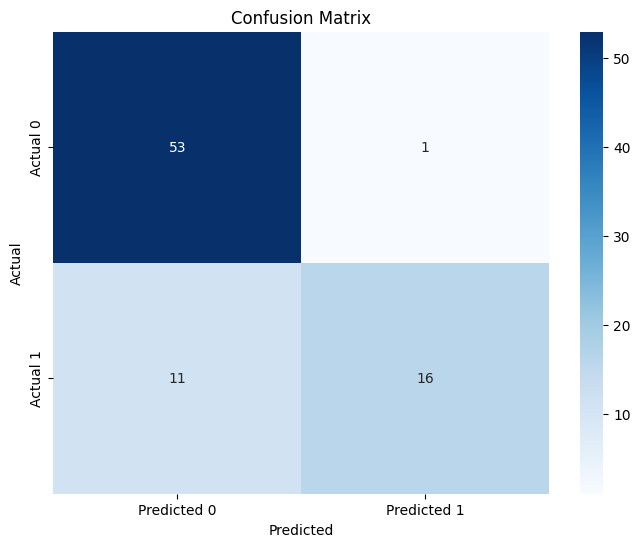

In [146]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the data from the text files
# Assuming the first file contains actual labels and the second file contains predicted labels
actual_labels = pd.read_csv('reject_data_human.txt', header=None).squeeze()  # Read actual labels
predicted_labels = pd.read_csv('reject_data_api.txt', header=None).squeeze()  # Read predicted labels

# Step 2: Generate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Step 3: Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Step 4: Optional - Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [145]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
